# Predicting the status of fitness of human based on Body Mass Index(BMI)  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [4]:
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.tail()


,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
data.head(30)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [9]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])

In [11]:
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [14]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly overfit','overweight','extremely overweight']

In [15]:
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)


In [16]:
data['Index']

0                overweight
1                       fit
2                overweight
3          slightly overfit
4          slightly overfit
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly overfit < overweight < extremely overweight]

In [17]:
data['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overfit         68
underweight              22
malnourished             13
Name: Index, dtype: int64

In [18]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

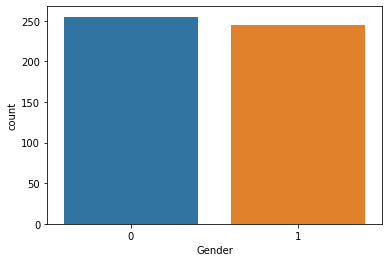

In [19]:
sns.countplot(data['Gender'])

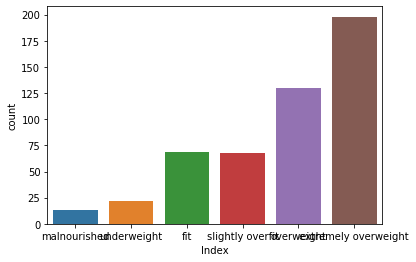

In [20]:
sns.countplot(data['Index'])

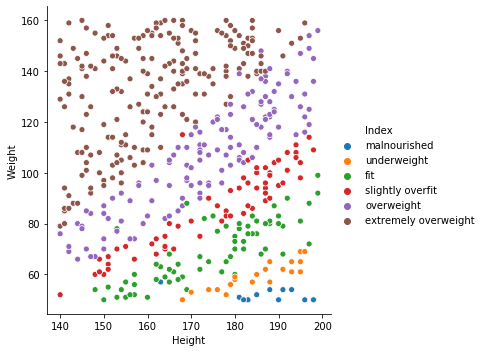

In [22]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

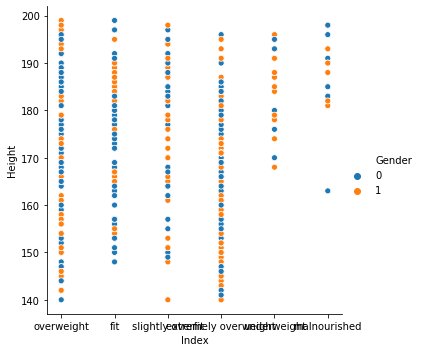

In [24]:
sns.relplot(x='Index',y='Height',hue='Gender',data=data)

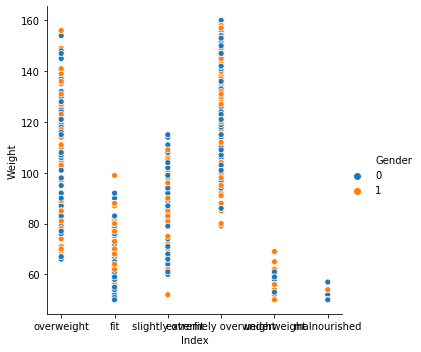

In [25]:
sns.relplot(x='Index',y='Weight',hue='Gender',data=data)

In [26]:
X=data.drop('Index',axis=1)
y=data['Index']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
classifier=svm.SVC()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [32]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
    slightly overfit       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [33]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [34]:
print(accuracy_score(y_test,pred))

0.85


In [43]:
pred[45]

'fit'

In [49]:
#manually checking with examples
a=[[1,180,40],[0,180,40]] #[gender,height,weight]
a=sc.transform(a)
b=classifier.predict(a)

In [52]:
print(b)

['underweight' 'fit']
